In [10]:
from module import calcFFT, generateSin, low_pass_filter
import numpy as np
import sounddevice as sd
from scipy.io import wavfile as sf
import matplotlib.pyplot as plt

In [11]:
duration = 5 
f_carrier = 14000
samplerate = 44100

In [12]:
# print(f'Gravando Audio por {duration} segundos')
# audio = sd.rec(duration*samplerate, samplerate, 2) # Gravando audio
# sd.wait()
# channel1 = audio[:,0]
# print('Gravação finalizada')

# freqs, ampls = calcFFT(channel1, samplerate)
# plt.plot(freqs, np.abs(ampls))
# plt.xlim(0, 20e3)
# plt.show()

# sf.write('audios/audio.wav', samplerate, audio) # Criando arquivo WAV

In [13]:
samplerate, signal = sf.read('audios/auau.wav') # Lendo o arquivo WAV channel1
time = np.linspace(0, duration, samplerate*duration)
channel1 = signal[:duration*samplerate, 0]

normalized = channel1/np.max(np.abs(channel1))
filtred = low_pass_filter(normalized)

_, carrier = generateSin(f_carrier, 5, samplerate)

moduled = filtred*carrier

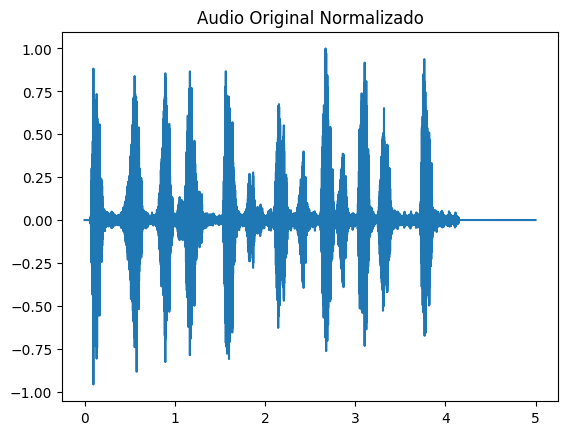

In [14]:
plt.plot(time, normalized)
plt.title('Audio Original Normalizado')
plt.show()

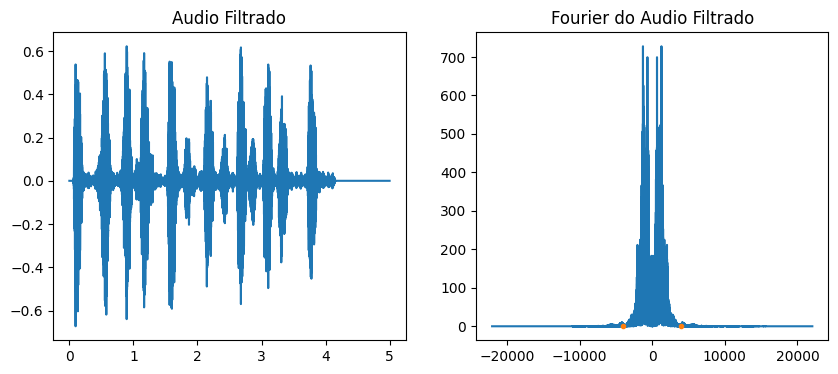

In [15]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(time, filtred)
plt.title('Audio Filtrado')


freqs, ampls = calcFFT(filtred, samplerate)
plt.subplot(122)
plt.plot(freqs, np.abs(ampls))
plt.plot([-4000, 4000], [0, 0], '.')
plt.title('Fourier do Audio Filtrado')

plt.show()

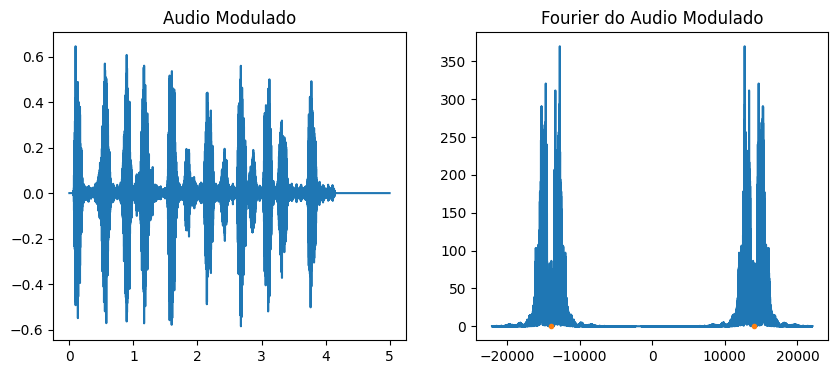

In [16]:
plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(time, moduled)
plt.title('Audio Modulado')

freqs, ampls = calcFFT(moduled, samplerate)
plt.subplot(122)
plt.plot(freqs, np.abs(ampls))
plt.plot([-14000, 14000], [0, 0], '.')
plt.title('Fourier do Audio Modulado')

plt.show()

In [17]:
sf.write('audios/encoded.wav', samplerate, np.array(moduled)) # Criando arquivo WAV modulado

In [18]:
# sd.play(moduled, samplerate)
# sd.wait()